# SOS Multiple Language Example
Script of Scripts (SOS) enables multiple languages (matlab, python, etc) to be used in a single jupyter notebook. 

[running SOS](https://vatlab.github.io/sos-docs/running.html#content)

## Installation
To install for jupyter notebook:
```
pip3 install sos
pip3 install sos-notebook
python3 -m sos_notebook.install
```
To install jupyterLab extension (note that this transient-display-data only supported for jupyterLab 1.0.0 alpha so it may be best to wait for the 1.0.0 releast to install. However SOS still currently works for notebooks in jupyterLab). 
```
jupyter labextension install transient-display-data
jupyter labextension install jupyterlab-sos
```

In a SOS notebook, the dropdown menu on the right side of each block is used to set the language kernel.

## Python in SOS
Python3 will be installed by default

In [194]:
print("hello world")

hello world


## Octave in SOS
Once Octave and SOS are installed, install the SOS Octave extension:
```
pip install sos-matlab
```

In [195]:
disp("hello world")

hello world


## Putting It All Together

Lets generate a complex baseband chirp:

\begin{align}
    s(t) &= \exp{(\pi j \frac{BW}{T} t^2)}
\end{align}

in octave and plot it in python using SOS to share data between kernels.

### Sharing variables between kernels
Using magic keywords, variables can be shared between kernels. This is still a little buggy but should improve with future versions of JupyterLab.

Generate a vector in Matlab/Octave:

In [196]:
% Octave/Matlab code
fs = 100e6;
N = 1280;

bw = 10e6;

n = [0:(N-1)]-N/2;
t = n/fs;

s = exp(1i*pi*.5*(bw/t(end))*(t.^2));

% vector parsing is still buggy, so let's help out SOS a little bit by passing it as a string
s = real(round((2^15)*s));
s = sprintf('%i,' , s);
s = ['[',s(1:end-1),']'];

In [197]:
%put s

Share it between kernels with SOS:

In [198]:
%get s --from Octave
s = s

Now load vector from octave and plot with python:

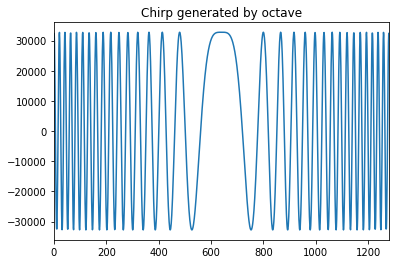

In [200]:
%expand

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

s = np.array({s})

plt.figure;
plt.plot(s);
plt.title('Chirp generated by octave');
plt.autoscale(enable=True, axis='x', tight=True);